In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [4]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [5]:
X.shape

(214, 9)

In [6]:
y.shape

(214,)

In [7]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


____

## K-Nearest-Neighbors - StandardScaler

In [8]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [9]:
features = df.columns[:-1].tolist()

X_sc_df = pd.DataFrame(X_sc, columns=features)
X_sc_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [10]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc_df, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_sc_train, y_train)
predictions = knn.predict(X_sc_test)

In [12]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [13]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", knn.score(X_sc_test, y_test))

correct: 34
incorrect: 20
accuracy score: 0.6296296296296297


In [16]:
y_pred = knn.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  1  0  0  0  0]
 [ 9 10  0  2  0  0]
 [ 2  2  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  8]]
0.6296296296296297


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.67      0.48      0.56        21
           3       0.00      0.00      0.00         4
           5       0.33      0.25      0.29         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

   micro avg       0.63      0.63      0.63        54
   macro avg       0.56      0.55      0.54        54
weighted avg       0.60      0.63      0.59        54



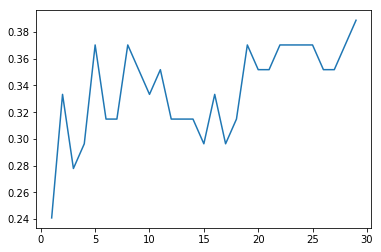

In [18]:
error=[]
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)    
    knn.fit(X_sc_train,y_train)
    pre=knn.predict(X_sc_test)
    error.append(np.mean(pre!=y_test))
    #print(classification_report(y_test,pre))
plt.plot(range(1,30),error)
plt.show()

___
## K-Nearest-Neighbors Classifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [22]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [23]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", knn.score(X_test, y_test))

correct: 34
incorrect: 20
accuracy score: 0.6296296296296297


In [24]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[12  1  1  0  0  0]
 [ 6 12  1  0  2  0]
 [ 4  0  0  0  0  0]
 [ 0  1  0  2  0  1]
 [ 0  1  0  0  1  1]
 [ 0  0  0  0  1  7]]
0.6296296296296297


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      0.86      0.67        14
           2       0.80      0.57      0.67        21
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         4
           6       0.25      0.33      0.29         3
           7       0.78      0.88      0.82         8

   micro avg       0.63      0.63      0.63        54
   macro avg       0.56      0.52      0.52        54
weighted avg       0.66      0.63      0.62        54



In [25]:
print('The accuracy of the knn classifier is {:.2f} on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.74 on training data
The accuracy of the knn classifier is 0.63 on test data


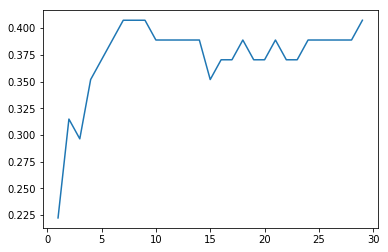

In [26]:
error=[]
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)    
    knn.fit(X_train,y_train)
    pre=knn.predict(X_test)
    error.append(np.mean(pre!=y_test))
    #print(classification_report(y_test,pre))
plt.plot(range(1,30),error)
plt.show()

___
## K-Nearest-Neighbors - Grid Search